# **Regularización**


En modelos de inteligencia artificial, la regularización es el proceso matemático consistente en agregar información para resolver un problema mal planteado o para evitar el overfitting. En otras palabras, la regularización es la agregación de algunos parámetros, llamados penalización, para mejorar el rendimiento de los modelos de IA y evitar problemas como el sobreajuste, es decir, ayudan a mejorar el proceso de generalización de los modelos de IA.

Consiste en agregar un término a la función de costo para penalizar modelos con parámetros muy grandes o complejos, previniendo el sobreajuste.

# **Técnicas de regularización comunes**

## **1.- Regularización L1 o Lasso:** 

Agrega un término de penalización a la función de pérdida del modelo, que es proporcional a la suma de los valores absolutos de los pesos __w__.  Este concepto se puede aplicar a las redes neuronales artificiales, pero también se puede aplicar a otros algoritmos de IA, como regresiones lineales, polinómicas y logística, máquinas de soporte vectorial, etc. En términos matemáticos se representaría así:

#### $$\frac{1}{N}\displaystyle\sum_{j=1}^{N}|w_j|$$

Al aplicarlo a una función de pérdida $J$ queda de la siguiente manera:

#### $$J_{total} = J_{original} + \lambda \cdot \frac{1}{N}\displaystyle\sum_{j=1}^{N}|w_j|$$

Donde:

- $J_{original}$ es la función de pérdida original.
- $\lambda$ es el hiperparámetro de regularización, que controla la magnitud de la penalización.
- $w_{j}$ son los pesos del modelo.

### _L1 aplicado a una función de pérdida_

Si agregamos esta penalización a la función de pérdida __Error cuadratico medio__, quedaria:

#### $$J = \frac{1}{M}\displaystyle\sum_{i=1}^{M}(y_i\ - \ f(x_i))^2 + \lambda \cdot \frac{1}{N}\displaystyle\sum_{j=1}^{N}|w_j|$$

### _Cuando usar la regularización Lasso_ 

> L1 es de ayuda cuando hay sospecha de que varias de las variables de entrada sean irrelevantes, es decir, aportan poco o nada a la solución del problema. 

> Al usar L1 , se está favoreciendo que la solución sea poco densa. Es decir, que algunos de los coeficientes terminen valiendo 0. Esto puede ser muy útil para determinar cuáles de los atributos de entrada son los más relevantes y que influyan en la obtención de modelos que generalice mejor.

> Lasso es muy útil en este sentido, pues hace la selección de atributos de entrada y funciona mejor cuando las variables no están muy correlacionadas entre sí.

## **2.- Regularización L2 (Ridge):** 

Técnica que agrega una penalización a la función de pérdida que depende del cuadrado de los pesos __w__ del modelo.

La penalización fuerza a los pesos a tener valores más pequeños, lo que evita que el modelo dependa demasiado de características particulares de los datos de entrenamiento (reduciendo el sobreajuste).

Al igual que ocurría en L1, L2 se puede aplicar a varias técnicas de ML. En términos matemáticos, se representa como sigue:

#### $$\lambda \cdot \displaystyle \frac{1}{2 \cdot N} \cdot \displaystyle\sum_{j=1}^{N}w_j^2$$

### _L2 aplicado a una función de pérdida_

Al agregar esta regularización a la funcion de pérdida __Error Cuadrático Medio__, quedaría:

#### $$J = \frac{1}{M}\displaystyle\sum_{i=1}^{M}(y_i\ - \ f(x_i))^2 + \lambda \cdot \displaystyle \frac{1}{2 \cdot N} \cdot \displaystyle\sum_{j=1}^{N}w_j^2$$

### _Cuando usar la regularizacion Ridge_

> Se recomienda usar esta regularización L2 cuando existen sospechas de que varias de las variables de entrada estén correlacionadas entre ellas. 𝑅𝑖𝑑𝑔𝑒 hace que los coeficientes acaben siendo más pequeños. Esta disminución de los coeficientes minimiza el efecto de la correlación entre los atributos de entrada y hace que el modelo generalice mejor.

> Esta L2 funciona mejor cuando la mayoría de los atributos son relevantes.

## **3.- Regularización $ElasticNet\ (L1\ y\ L2)$**

Elastic Net es una técnica de regularización que combina L1 (Lasso) y L2 (Ridge) para mejorar la estabilidad y la capacidad de selección de características de un modelo de IA.

Utiliza un parámetro $r$ que indica la importancia relativa que pueden tener _Lasso_ y _Ridge_ respectivamente.

#### $$C = r \cdot Lasso + (1-r) \cdot Ridge$$

### _ElasticNet aplicado a una función de pérdida_

Para este caso, aplicamos la regularización $C$ a la función de pérdida __Error Cuadrático Medio__, la cual se expresa como sigue:

#### $$J = \frac{1}{M}\displaystyle\sum_{i=1}^{M}(y_i\ - \ f(x_i))^2 + r \cdot \lambda \frac{1}{N}\displaystyle\sum_{j=1}^{N}|w_j| + (1-r) \cdot \lambda \frac{1}{2N}\displaystyle\sum_{j=1}^{N}w_j^2$$

> Si $r=1$, entonces el tercer término de la ecuación se hace cero y la regularización se vuelve L1.

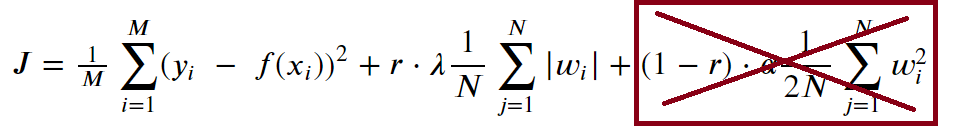

> Si $r=0$, entonces el segundo término de la ecuación anterior se hace cero y la regularización se convierte en sólo L2.

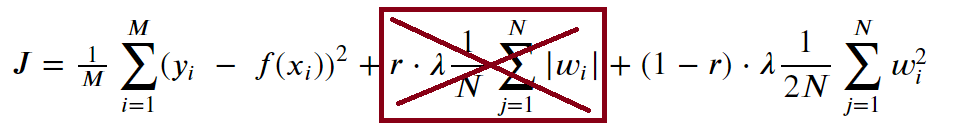

### _Cuando usar la regularización ElasticNet_

> Es útil cuando hay muchas características y posible multicolinealidad. Es un buen equilibrio entre la selección de características de Lasso y la estabilidad de Ridge.

# **Técnicas de regularización en redes neuronales**

Entre las técnicas de regularización más utilizadas en redes neuronales tenemos:

## **1.- Dropout**

Funciona desconectando neuronas de manera aleatoria durante el entrenamiento para evitar que el modelo dependa demasiado de neuronas específicas.

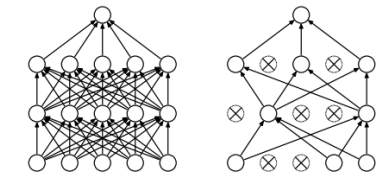

- La imagen de la izquierda muestra una red neuronal densa donde cada capa esta conectada completamente con la capa siguiente. 

- Durante el entrenamiento, se desactivan aleatoriamente algunas neuronas en cada capa con una probabilidad _p_ como se muestra en la imagen derecha.

- Esto evita que la red neuronal dependa demasiado de ciertas neuronas, promoviendo mayor robustez.

- Se activa sólo en el entrenamiento y se desactiva en la inferencia.

## **2.- Early Stopping:**

Es una técnica de regularización que detiene el entrenamiento de un modelo cuando su rendimiento comienza a disminuir. Se usa para evitar el sobreentrenamiento.

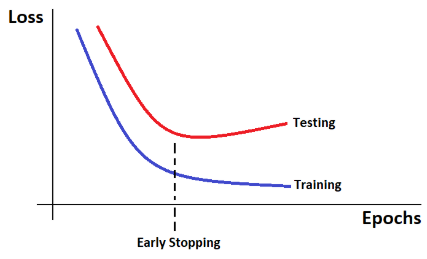

- Funciona monitoreando la pérdida en validación durante el entrenamiento antes que empeore. Si el modelo deja de mejorar depués de varia épocas, se detiene automáticamente para evitar el sobreajuste.

- También para evitar entrenar épocas innecesarias, ahorrando tiempo y recursos computacionales. 

- Es muy útil cuando el conjunto de entrenamiento es pequeño, ya que el modelo puede memorizar el conjunto de entrenamiento rápidamente impidiendo una buena generalización.

## **3.- Batch Normalization:**

Es una técnica que mejora el entrenamiento de redes neuronales profundas. Se utiliza para normalizar las entradas de cada capa, lo que hace que el entrenamiento sea más rápido y estable. Reduce la dependencia de los pesos iniciales y la inestabilidad en la propagación de gradientes.

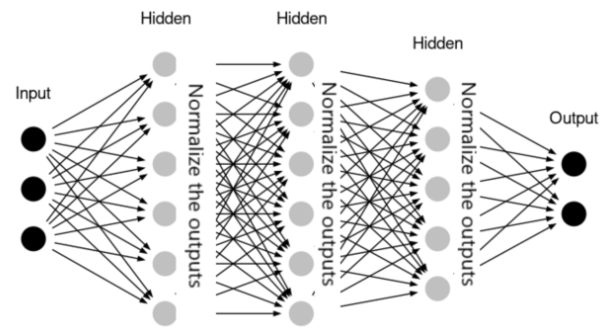

- Funciona calculando la media y la varianza de los mini-lotes.

- Se normaliza cada activación usando la media y la varianza calculadas del mini-lotes.

- Se escalan y desplazan las activaciones normalizadas.

- Son muy útiles en modelos con activaciones no lineales como ReLU, que pueden generar activaciones muy grandes o pequeñas. 

- Tambien es útil en modelos sensibles a la inicialización de pesos y mejoran el flujo de gradiente a través de la red. Regulariza el modelo y reduce la necesidad de Dropout. 

# **Ejemplo práctico de Regularización.**

Vamos a aplicar las técnicas de regularización más comunes en un modelo de red neuronal para ver qué tanto mejoran los resultados.

Utilizamos el dataset MNIST correspondiente a imagenes de digitos manuscritos en escala de grises.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


2025-04-12 12:39:27.807415: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-12 12:39:28.176100: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-12 12:39:28.434741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744479568.607469   25016 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744479568.660267   25016 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-12 12:39:29.185210: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

## **Aplicando el método Dropout**

Utilizamos una red neuronal multicapa (MLP), para clasificar imágenes del conjunto MNIST. La capa inicial es de 512 neuronas debido a que los pixeles de la imágenes posee la misma cantidad. La segunda capa posee tambien 512 neuronas y la última capa es de 10 neuronas, una por cada dígito (0 a 9).

Aplicamos entre las capas el método dropout con un valor de 0.5 el cual indica  se desconectarán el 50% de las neuronas aleatoriamente.

In [3]:
# Crear el modelo con Dropout
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.5))  # Regularización con Dropout
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Regularización con Dropout
model.add(Dense(10, activation='softmax'))

Compilamos el modelo. Utilizamos como función de pérdida _categorical_crossentropy_  que se usa para clasificación multiclase como este caso. Para optimizar, utilizamos _Adam_ y como métrica _accuracy_ que mide el porcentaje de predicciones correctas.

In [4]:
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Entrenamos el modelo. Se entrena el modelo por 20 épocas con batches de 128 imágenes y se usa el 20% del conjunto de entrenamiento como datos de validación.

In [5]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/20


2025-04-12 12:55:01.675768: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7849 - loss: 0.6756

2025-04-12 12:55:13.094556: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7857 - loss: 0.6734 - val_accuracy: 0.9596 - val_loss: 0.1391
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9438 - loss: 0.1866 - val_accuracy: 0.9676 - val_loss: 0.1046
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9569 - loss: 0.1428 - val_accuracy: 0.9737 - val_loss: 0.0871
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9658 - loss: 0.1129 - val_accuracy: 0.9716 - val_loss: 0.0929
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9701 - loss: 0.0951 - val_accuracy: 0.9752 - val_loss: 0.0828
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9730 - loss: 0.0860 - val_accuracy: 0.9775 - val_loss: 0.0792
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9731 - loss: 0.0822 - val_accuracy: 0.9768 - val_loss: 0.0777
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9765 - loss: 0.0733 - val_accurac

Evaluamos el modelo a través de la pérdida y precisión del conjunto de prueba, que nunca fue visto durante el entrenamiento por el modelo.

In [6]:
# Evaluar el modelo
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06617096811532974
Test accuracy: 0.9822999835014343


> El valor alto de accuraccy indica que el modelo generaliza bien a datos nuevos.

> El valor bajo de loss sugiere que el modelo esta cometiendo muy pocos errores en las predicciones.

> El accuracy de validacion (val_accuracy) es del 98.13%, muy similar al accuracy de entrenamiento lo que sugiere que no hay suficiente señales claras de sobreajuste.

> En general, el modelo muestra un buen desempeño

## __Aplicando el método Early Stopping__

Vamos aplicar este metodo al modelo anterior, sin dropout, y analizar los resultados del sobreajuste.

In [ ]:
# crear el modelo
model = Sequential([
    Dense(512, activation='relu', input_shape=(28*28,)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

Compilamos el modelo con la misma configuración anterior.

In [8]:
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Definimos la configuración de __Early Sttoping__ para que detenga el entrenamiento si la pérdida de validación no mejora en 3 épocas consecutivas. Activamos el parámetro _restore_best_weights_ para que recupere los pesos con mejor rendimiento en validación. 

In [9]:
# Definir Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Entrenamos el modelo con la misma configuración que el modelo anterior.

In [ ]:
# entrenar el modelo
model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20


2025-04-12 13:08:27.942783: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8670 - loss: 0.4546 - val_accuracy: 0.9613 - val_loss: 0.1296
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9727 - loss: 0.0936 - val_accuracy: 0.9743 - val_loss: 0.0905
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9838 - loss: 0.0518 - val_accuracy: 0.9719 - val_loss: 0.0938
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9879 - loss: 0.0377 - val_accuracy: 0.9746 - val_loss: 0.0875
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9918 - loss: 0.0268 - val_accuracy: 0.9770 - val_loss: 0.0866
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9933 - loss: 0.0205 - val_accuracy: 0.9760 - val_loss: 0.0932
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9948 - loss: 0.0146 - val_accuracy: 0.9778 - val_loss: 0.0871
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9948 - loss: 0.0156 - val_accuracy:

Evaluamos el modelo a través de la pérdida y precisión del conjunto de prueba, que nunca fue visto durante el entrenamiento por el modelo.

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07089805603027344
Test accuracy: 0.9797000288963318


> El accuracy de entrenamiento es muy alto lo que indica que el modelo clasificó correctamente casi el 98% de las imágenes.

> El loss de prueba fue bastante bajo, lo que indica que el modelo cometió pocos errores.

> El accuracy de validacion fue de 97.82%, muy cercano al accuracy de entrenamiento lo que indica que no hubo sobreajuste.

> Es importante resaltar que esta técnica permitió un ahorro de tiempo y poder computacional debido a que detuvo el entrenamiento en la época 8, obteniendo la misma calidad que el modelo anterior.

## __Aplicando el método Batch Normalization__

Al mismo modelo usado anteriormente, aplicamos __Batch Normalization__ entre las salidas de las capas para estabilizar el entrenamiento. 

In [ ]:
from tensorflow.keras.layers import Dense, BatchNormalization

# crear el modelo
model_3 = Sequential([
    Dense(512, input_shape=(28*28,)),
    BatchNormalization(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])


/home/jbernal/anaconda3/envs/tf_cpu_3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilamos el modelo con la misma configuración ya usada.

In [ ]:
# compilar el modelo
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Entrenamos el modelo con los mismos parámetros que los modelos anteriores.

In [ ]:
# entrenar el modelo
model_3.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.8959 - loss: 0.3526 - val_accuracy: 0.9664 - val_loss: 0.1130
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9725 - loss: 0.0922 - val_accuracy: 0.9697 - val_loss: 0.1008
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9805 - loss: 0.0629 - val_accuracy: 0.9705 - val_loss: 0.0939
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9854 - loss: 0.0474 - val_accuracy: 0.9703 - val_loss: 0.1003
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9886 - loss: 0.0372 - val_accuracy: 0.9698 - val_loss: 0.1057
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9896 - loss: 0.0330 - val_accuracy: 0.9756 - val_loss: 0.0864
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9910 - loss: 0.0279 - val_accuracy: 0.9763 - val_loss: 0.0855
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9925 - loss: 0.0235 - 

Evaluamos el modelo e interpretamos los resultados.

In [15]:
score = model_3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08657750487327576
Test accuracy: 0.9807999730110168


> El accuracy de entrenamiento es muy alto lo cual indica que el modelo generaliza bien a datos nuevos.

> El loss de prueba es muy bajo lo que indica que el modelo asigna alta probabilidad a la clase correcta.

> El accuracy de prueba fue de 97.76%, muy cercanos al accuracy de entrenamiento lo que indica que no hay evidencia de sobreajute.
